# Car Prices Poland: Predict sale prices for cars in Poland

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Load the data

In [3]:
data = pd.read_csv(r'E:\Proyects\Python proyects\Datasets\Car_Prices_Poland_Kaggle.csv')

print(data.head(5))    # to see the information of the 5 first rows
print('\n'+'------------------------------------')
print(data.tail(5))    # to see the information of the 5 last rows

   Unnamed: 0  mark  model generation_name  year  mileage  vol_engine    fuel  \
0           0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1           1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2           2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3           3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4           4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  
0            Janki  Mazowieckie  35900  
1         Katowice      Śląskie  78501  
2            Brzeg     Opolskie  27000  
3        Korfantów     Opolskie  30800  
4  Tarnowskie Góry      Śląskie  35900  

------------------------------------
        Unnamed: 0   mark  model    generation_name  year  mileage  \
117922      117922  volvo  xc-90  gen-ii-2014-xc-90  2020    40000   
117923      117923  volvo  xc-90  gen-ii-2014-xc-90  2017    51000   
117924      117924 

In [4]:
print(data.columns)    # to see the columns names

Index(['Unnamed: 0', 'mark', 'model', 'generation_name', 'year', 'mileage',
       'vol_engine', 'fuel', 'city', 'province', 'price'],
      dtype='object')


### Explore the data

In [5]:
data.shape     # it shows the total number of rowa and columns of the dataset

(117927, 11)

In [6]:
data.dtypes    # it shows the data type of each column

Unnamed: 0          int64
mark               object
model              object
generation_name    object
year                int64
mileage             int64
vol_engine          int64
fuel               object
city               object
province           object
price               int64
dtype: object

In [7]:
data.nunique()  # it shows the total number of uniques values in each column of the dataset

Unnamed: 0         117927
mark                   23
model                 328
generation_name       364
year                   54
mileage             35394
vol_engine            508
fuel                    6
city                 4427
province               23
price                9310
dtype: int64

In [8]:
data.count()  # it shows the total number of non-null in each solumn

Unnamed: 0         117927
mark               117927
model              117927
generation_name     87842
year               117927
mileage            117927
vol_engine         117927
fuel               117927
city               117927
province           117927
price              117927
dtype: int64

In [9]:
data.info()  # provides basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


### Eliminate the column 'Unnamed'

In [10]:
data = data.drop(columns=['Unnamed: 0'])

In [11]:
print(data.head(5))

   mark  model generation_name  year  mileage  vol_engine    fuel  \
0  opel  combo      gen-d-2011  2015   139568        1248  Diesel   
1  opel  combo      gen-d-2011  2018    31991        1499  Diesel   
2  opel  combo      gen-d-2011  2015   278437        1598  Diesel   
3  opel  combo      gen-d-2011  2016    47600        1248  Diesel   
4  opel  combo      gen-d-2011  2014   103000        1400     CNG   

              city     province  price  
0            Janki  Mazowieckie  35900  
1         Katowice      Śląskie  78501  
2            Brzeg     Opolskie  27000  
3        Korfantów     Opolskie  30800  
4  Tarnowskie Góry      Śląskie  35900  


### Eliminate the null values

* We chose to eliminate the 'generation_name' column because it has too many null values

In [12]:
data = data.drop(columns=['generation_name'])

In [13]:
data.head(5)

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


### Create a dataset savepoint

In [14]:
data.to_csv(r'E:\Proyects\Python proyects\Datasets\Car_Prices_Poland_Modified.csv', index=False)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mark        117927 non-null  object
 1   model       117927 non-null  object
 2   year        117927 non-null  int64 
 3   mileage     117927 non-null  int64 
 4   vol_engine  117927 non-null  int64 
 5   fuel        117927 non-null  object
 6   city        117927 non-null  object
 7   province    117927 non-null  object
 8   price       117927 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 8.1+ MB


In [16]:
data.nunique()

mark             23
model           328
year             54
mileage       35394
vol_engine      508
fuel              6
city           4427
province         23
price          9310
dtype: int64

### Ploting the data

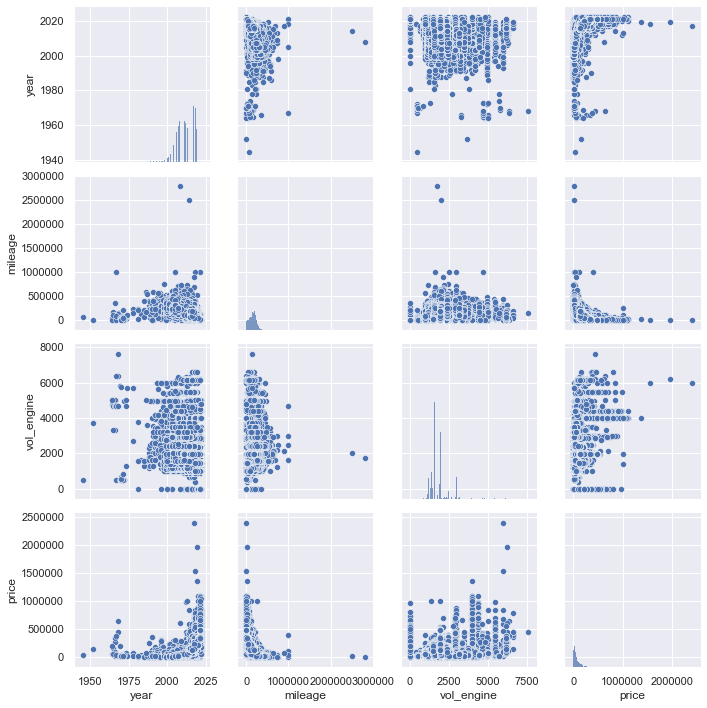

In [17]:
sns.pairplot(data)

### Creating dummy variables

* The idea is to transform the non numeric values into numeric values

In [18]:
df = pd.get_dummies(data)

In [19]:
df.head()

,year,mileage,vol_engine,price,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,...,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,2015,139568,1248,35900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,31991,1499,78501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2015,278437,1598,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2016,47600,1248,30800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,103000,1400,35900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
df.shape    # 117927 rows and 4811 columns, where 0 = False and 1 = True

(117927, 4811)

### Create the regression

*  to get all the columns minus 'price'

In [21]:
feature_cols = df.drop(["price"],axis=1)
x = feature_cols
y = df['price']

In [22]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [23]:
lm.score(x,y)

0.7926524150935859

In [24]:
lm.intercept_

-10293173.660122326

In [25]:
lm.coef_

array([ 5.15886793e+03, -2.51847290e-01,  1.22406822e+01, ...,
        1.07277766e+04,  5.33516930e+03,  4.65348376e+03])

* We got a 79% accuracy

In [27]:
df["prediction"] = lm.predict(pd.DataFrame(feature_cols))

In [28]:
df.head()

,year,mileage,vol_engine,price,mark_alfa-romeo,mark_audi,mark_bmw,mark_chevrolet,mark_citroen,mark_fiat,...,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wiedeń,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie,prediction
0,2015,139568,1248,35900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36624.058768
1,2018,31991,1499,78501,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,84175.062482
2,2015,278437,1598,27000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13794.490336
3,2016,47600,1248,30800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29622.823424
4,2014,103000,1400,35900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,35263.266520


In [43]:
df.to_csv(r'E:\Proyects\Python proyects\Datasets\Car_Prices_Poland_Final.csv', index=False)

In [55]:
tableau_df = df[["year","price","prediction"]]

In [56]:
final_df.head()

,year,price,prediction
0,2015,35900,36624.058768
1,2018,78501,84175.062482
2,2015,27000,13794.490336
3,2016,30800,29622.823424
4,2014,35900,35263.266520


In [58]:
tableau_df.to_csv(r'E:\Proyects\Python proyects\Datasets\Car_Prices_Poland_Tableau.csv', index=False)